In [33]:
import csv
import datetime
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from dtw import dtw

In [2]:
data_dir = "."
def get_files(file_re):
    files = []
    for filename in os.listdir(data_dir):
        print(filename)

def get_csv_data(filename):
    data = []
    with open(filename, 'r') as f:
        b = csv.reader(f)
        next(b)
        for row in b:
            data.append(row)
    return data

In [3]:
raw_data = get_csv_data("complied_all_data.csv")

In [19]:
filt_data = {}
for row in raw_data:
    src = row[0]
    dest = row[1]
    # trav_date = datetime.datetime.strptime(row[3], "%Y-%m-%d")
    # book_date = datetime.datetime.strptime(row[2], "%Y-%m-%d")

    # if (trav_date - book_date).days > 90: continue
    
    if (src,dest) not in filt_data.keys():
        filt_data[(src,dest)] = []
    filt_data[(src,dest)].append(row)

In [21]:
def calc_avg_on_days_ago(data):
    delta = 90
    sum = [0]*(delta+1)
    cnt = [0]*(delta+1)
    
    tot_cnt = 0
    for row in data:
        trav_date = datetime.datetime.strptime(row[3], "%Y-%m-%d")
        book_date = datetime.datetime.strptime(row[2], "%Y-%m-%d")
        diff = trav_date - book_date
        if (diff.days < delta):
            ind = diff.days
            sum[ind] += int(row[4])
            cnt[ind] += 1
            tot_cnt += 1
    
    avg = [0]*(delta+1)
    for i in range(delta+1):
        if (cnt[i]==0):
            # print("No data for ", i)
            avg[i] = 0;
        else:
            avg[i] = sum[i]/cnt[i]

    print("Points Processed: ", tot_cnt)
    return avg

In [25]:
def plot_days_ago_data(route, data):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(data)), data, color='skyblue')
    plt.xlabel("Days Ago")
    plt.ylabel("Average Price")
    plt.title("Days ago Average Price "+ route[0]+" to "+route[1])
    plt.show()

In [24]:
days_ago_data = {}
for key in filt_data.keys():
    # print(key)
    days_ago_data[key] = calc_avg_on_days_ago(filt_data[key])

Points Processed:  3599
Points Processed:  3599
Points Processed:  3689
Points Processed:  3665
Points Processed:  3216
Points Processed:  1581


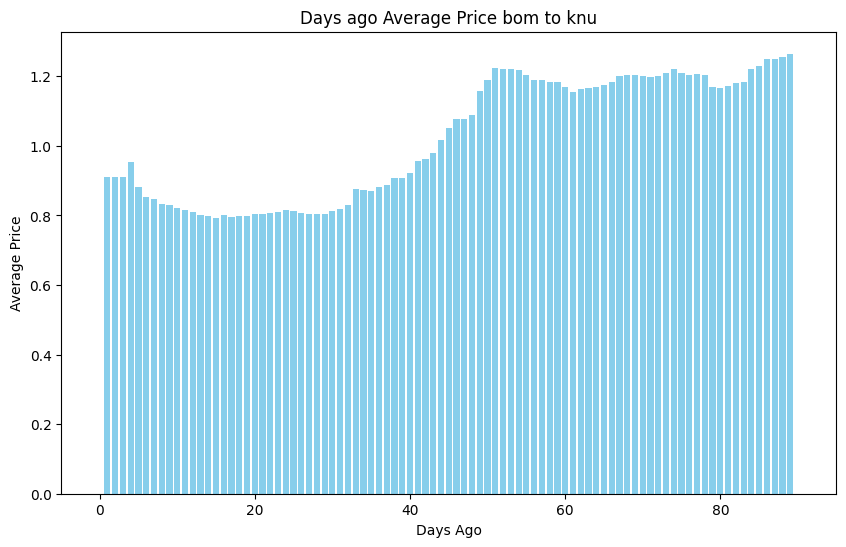

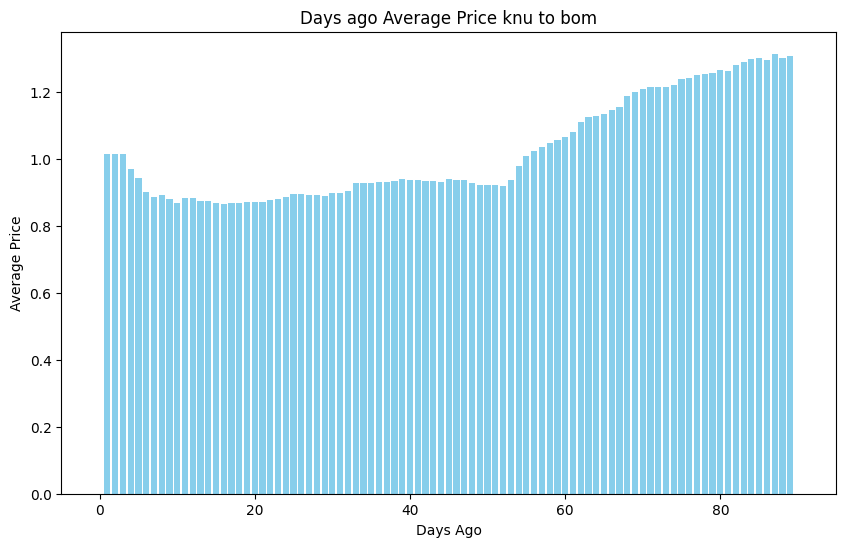

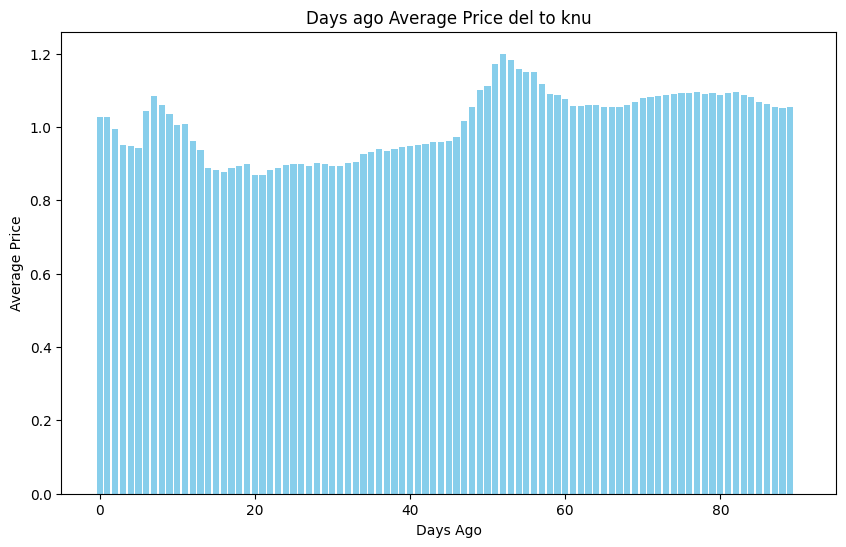

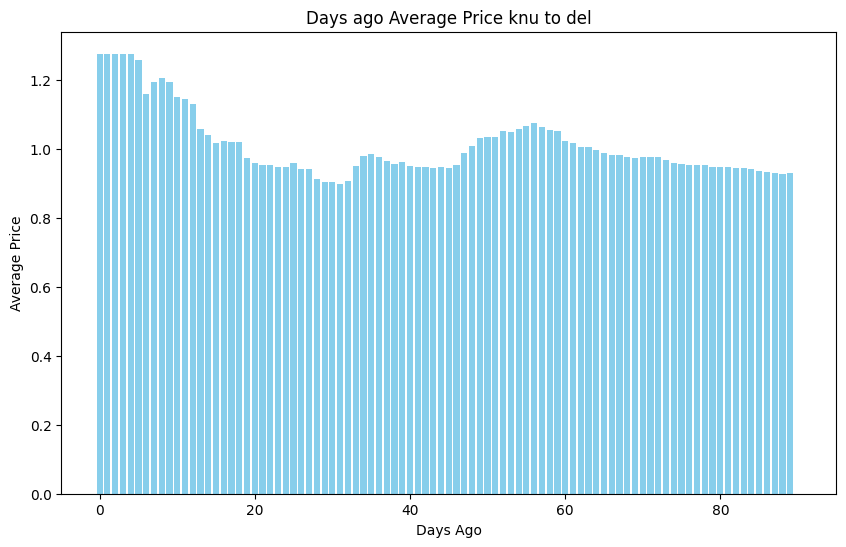

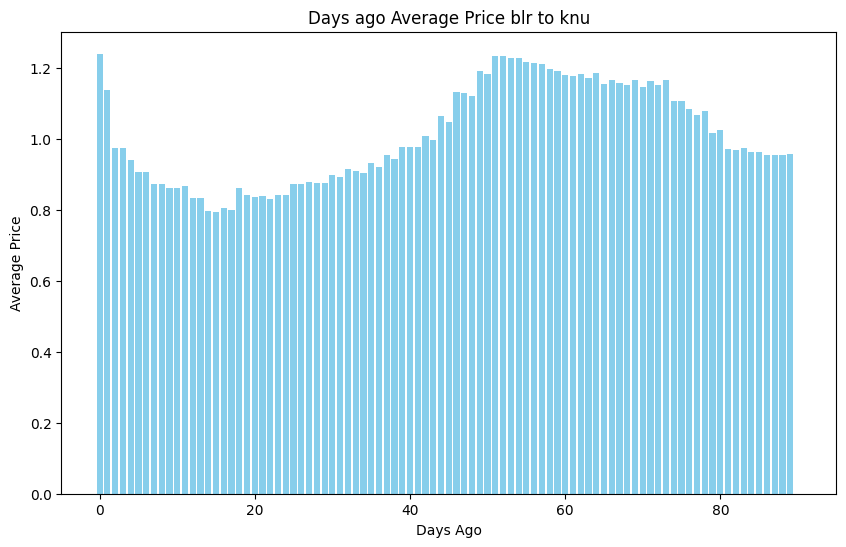

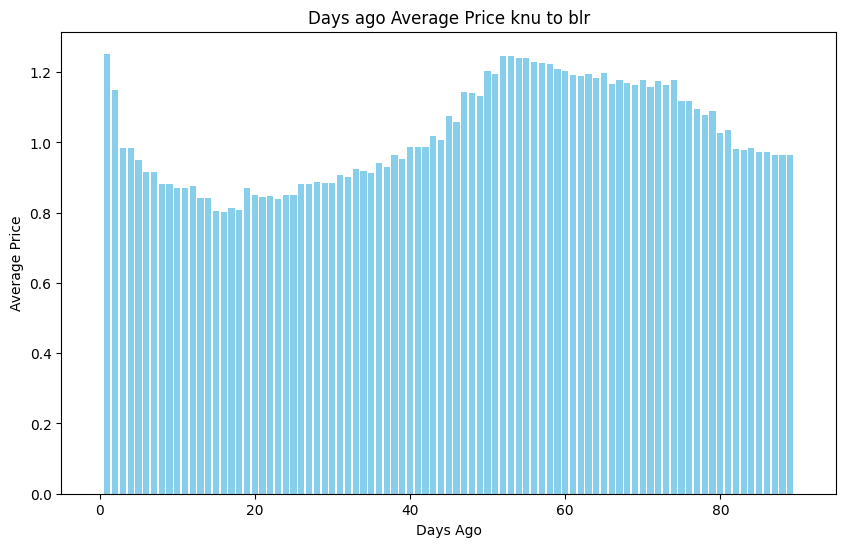

In [29]:
for key in days_ago_data.keys():
    vals = days_ago_data[key]
    mean = sum(vals)/len(vals)
    vals = [x/mean for x in vals]
    days_ago_data[key] = vals
    plot_days_ago_data(key, vals)

In [50]:
def apply_dtw(list1, list2):
# Convert lists to numpy arrays
    list1 = np.array(list1).reshape(-1, 1)
    list2 = np.array(list2).reshape(-1, 1)

    # Compute DTW distance
    d, cost_matrix, acc_cost_matrix, path = dtw(list1, list2, dist=lambda x, y: abs(x - y))

    # Access the DTW distance and path
    # distance = alignment.distance
    # path = alignment.index1, alignment.index2
    plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
    plt.plot(path[0], path[1], 'w')
    plt.show()

    # return distance[0]

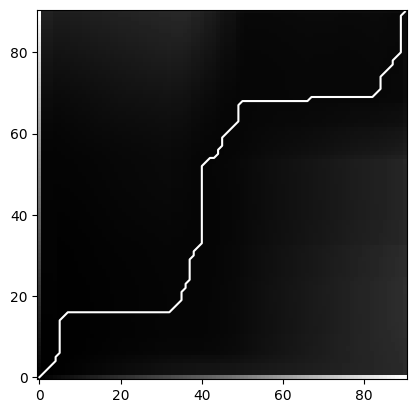

('bom', 'knu')  and  ('knu', 'bom')  =  None


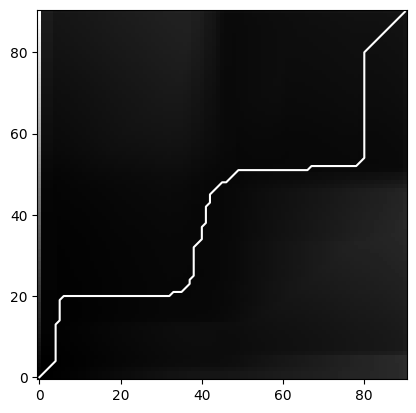

('bom', 'knu')  and  ('del', 'knu')  =  None


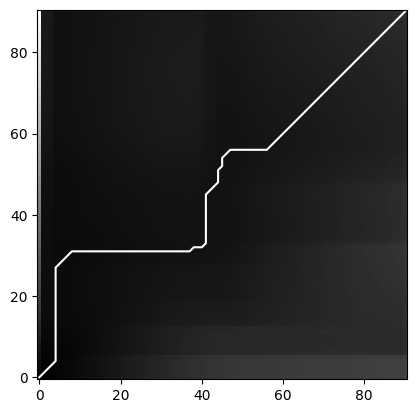

('bom', 'knu')  and  ('knu', 'del')  =  None


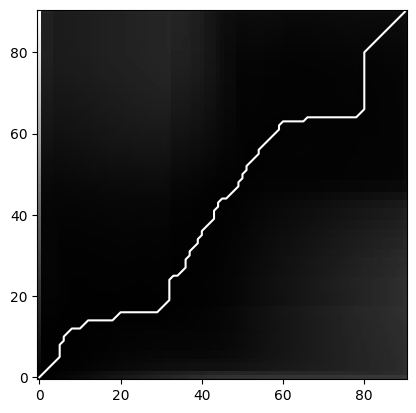

('bom', 'knu')  and  ('blr', 'knu')  =  None


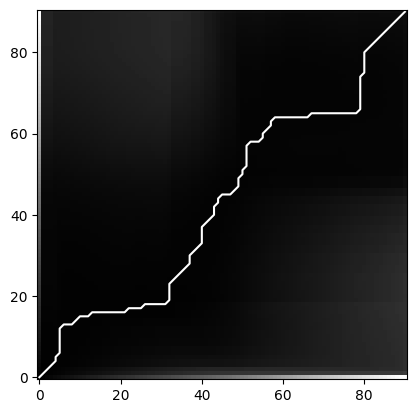

('bom', 'knu')  and  ('knu', 'blr')  =  None


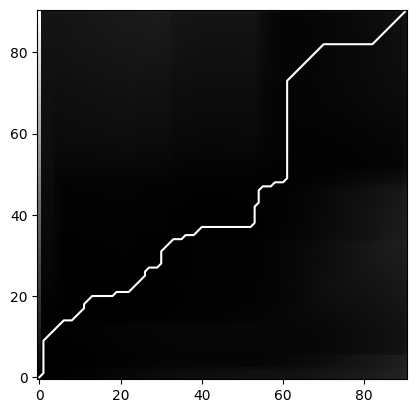

('knu', 'bom')  and  ('del', 'knu')  =  None


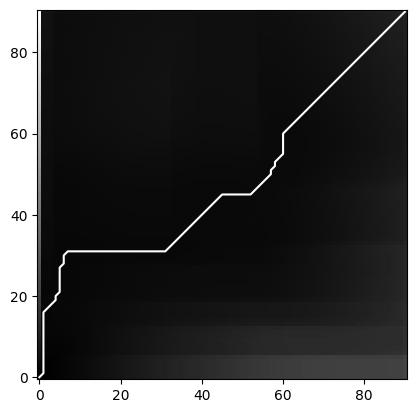

('knu', 'bom')  and  ('knu', 'del')  =  None


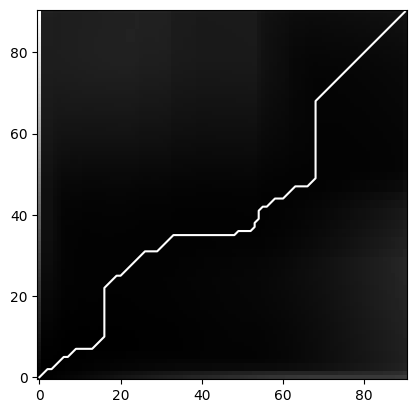

('knu', 'bom')  and  ('blr', 'knu')  =  None


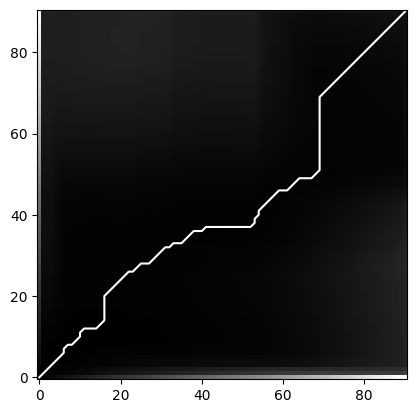

('knu', 'bom')  and  ('knu', 'blr')  =  None


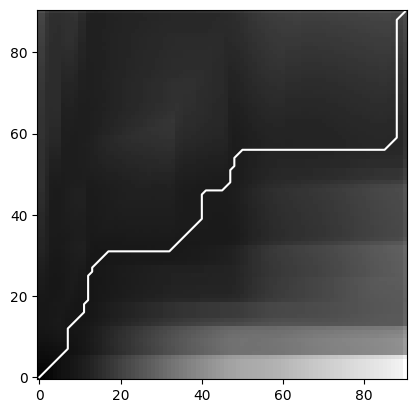

('del', 'knu')  and  ('knu', 'del')  =  None


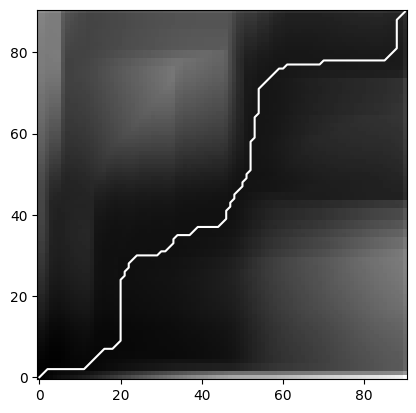

('del', 'knu')  and  ('blr', 'knu')  =  None


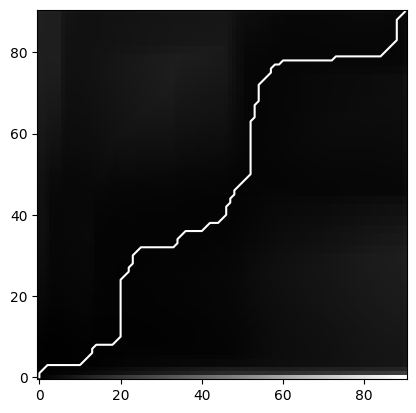

('del', 'knu')  and  ('knu', 'blr')  =  None


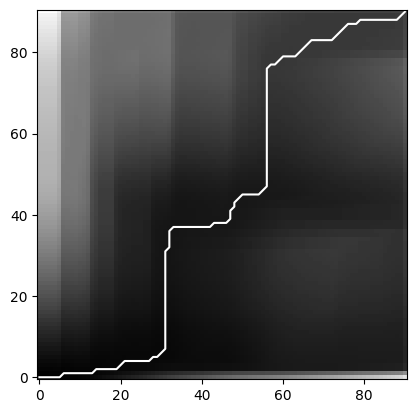

('knu', 'del')  and  ('blr', 'knu')  =  None


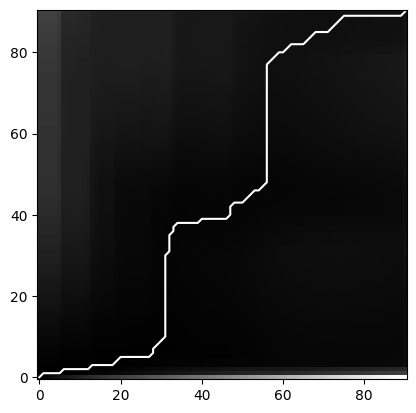

('knu', 'del')  and  ('knu', 'blr')  =  None


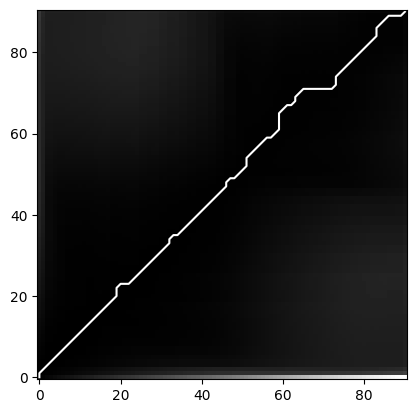

('blr', 'knu')  and  ('knu', 'blr')  =  None


In [51]:
routes = list(days_ago_data.keys())
# print(routes)
# days_ago_data[routes[0]]
# score = apply_dtw(days_ago_data[routes[0]], days_ago_data[routes[0]])
# print("Base score = ", score)

for i in range(len(routes)):
    for j in range(i+1, len(routes)):
        k1 = routes[i]
        k2 = routes[j]
        score = apply_dtw(days_ago_data[k1], days_ago_data[k2])
        print(k1 , " and ", k2, " = ", score)
        